In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Devtern project/Heart_Disease_Prediction.csv")

In [2]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [3]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Heart Disease'] = encoder.fit_transform(data['Heart Disease'])

In [7]:
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


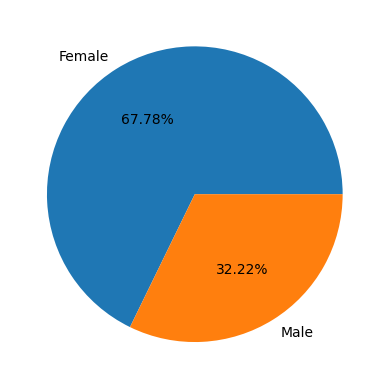

In [8]:
import matplotlib.pyplot as plt

plt.pie(data['Sex'].value_counts(),labels=['Female', 'Male'], autopct='%.2f%%')
plt.show()

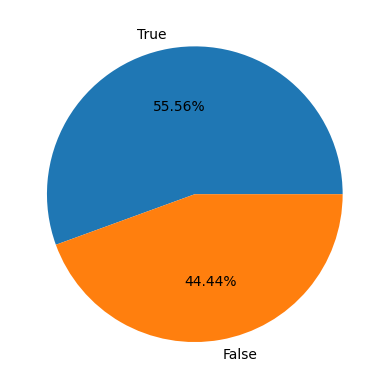

In [9]:
plt.pie(data['Heart Disease'].value_counts(),labels=['True', 'False'], autopct='%.2f%%')
plt.show()

In [10]:
x = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42)

In [12]:
print("x.shape:", x.shape, "\n x_train.shape:", x_train.shape, "\n x_test.shape:", x_test.shape, "\n")
print("y.shape:", y.shape, "\n y_train.shape:", y_train.shape, "\n y_test.shape:", y_test.shape)

x.shape: (270, 13) 
 x_train.shape: (216, 13) 
 x_test.shape: (54, 13) 

y.shape: (270,) 
 y_train.shape: (216,) 
 y_test.shape: (54,)


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [21]:
print("Precision: ", precision, "\n")
print("Testing Accuracy: ", test_accuracy, "\n")
print("Recall: ", recall, "\n")
print("F1 Score: ",f1, "\n")
print("Confusion Matrix:\n ",confusion_mat, "\n")


Precision:  0.9444444444444444 

Testing Accuracy:  0.9074074074074074 

Recall:  0.8095238095238095 

F1 Score:  0.8717948717948718 

Confusion Matrix:
  [[32  1]
 [ 4 17]] 



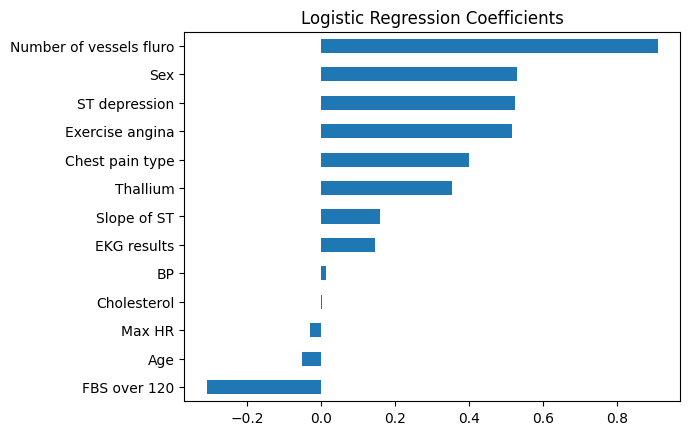

In [23]:
import pandas as pd

coefficients = pd.Series(model.coef_[0], index=x.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.show()